In [1]:
# Data handling and numerical operations
import pandas as pd                                 # Data manipulation and analysis
import numpy as np
import math                                  # Numerical operations

# Data visualization
import matplotlib.pyplot as plt                     # Plotting graphs
import seaborn as sns                               # Advanced data visualization

# Scikit-learn
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Utility libraries
%matplotlib inline
# Downloading NLTK resources
# nltk.download('stopwords')

# Other libraries
from scipy.stats import skew, kurtosis, iqr
import logging

# Setting up the environment
pd.set_option('display.max_colwidth', None)
plt.rcParams['figure.dpi'] = 500
sns.set_style("whitegrid", {'axes.grid' : False})
logging.basicConfig(level=logging.WARNING, format='%(asctime)s - %(levelname)s - %(message)s')

In [2]:
df = pd.read_feather("../Data/Full_Data.feather")

In [3]:
df.head(10)

,text,sentiment
0,video offic mind busi david solomon tell gs intern learn wa,0
1,price lumber lb f sinc hit ytd high maci turnaround still happen,0
2,say american dream dead,-1
3,barri silbert extrem optimist bitcoin predict new crypto entrant go zero,1
4,satellit avoid attack space junk circl earth paid,-1
5,david butler favorit fang stock realmoneysod alphabet facebook,0
6,miss convo one favorit thinker,0
7,u intellig document nelson mandela made public,0
8,senat want emerg alert go netflix spotifi etc,1
9,hedg fund manag marc larsi say bitcoin k possibl,0


In [4]:
X = df['text']
Y = df['sentiment']

In [5]:
le =LabelEncoder()
y = le.fit_transform(Y)
y

array([1, 1, 0, ..., 2, 2, 0])

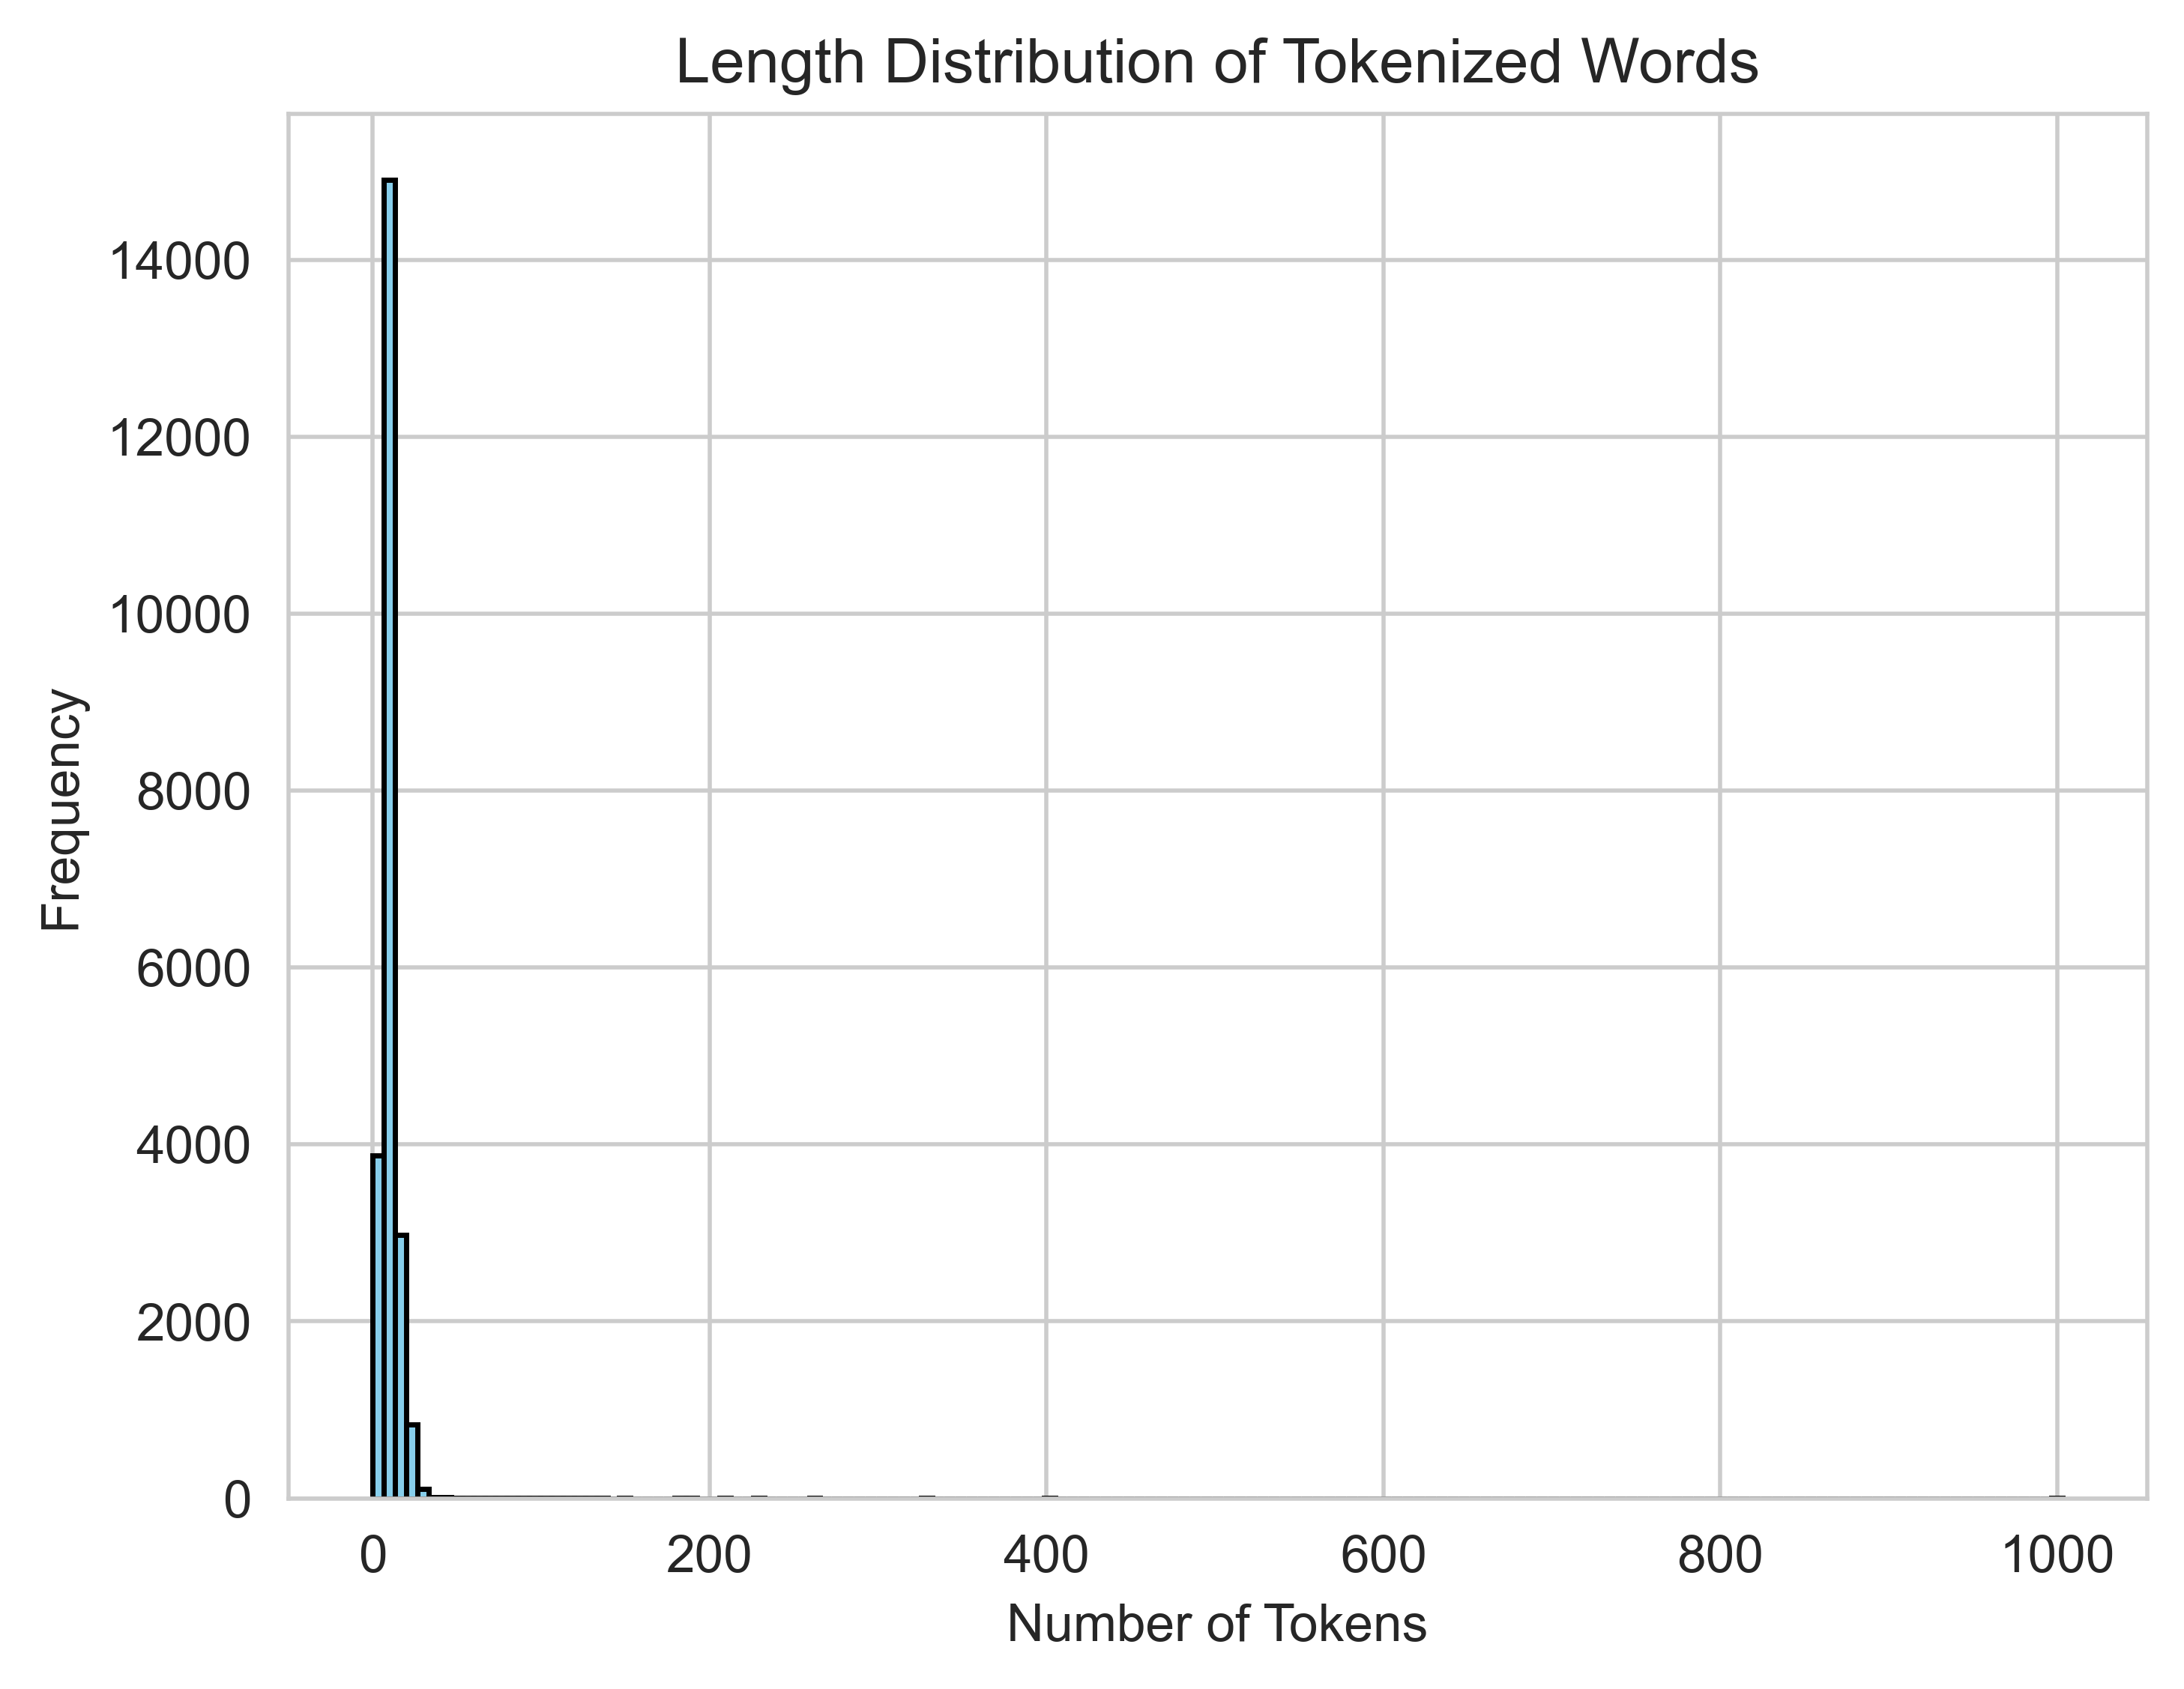

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# checking the max length required for padding
token_lengths = [len(tokens) for tokens in X_train_seq]
plt.hist(token_lengths, bins=math.ceil(np.sqrt(len(token_lengths))), color='skyblue', edgecolor='black')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Length Distribution of Tokenized Words')
plt.grid(True)
plt.show()


In [7]:
token_lengths

[8,
 9,
 9,
 14,
 4,
 8,
 6,
 14,
 7,
 9,
 7,
 8,
 12,
 7,
 7,
 10,
 17,
 9,
 7,
 7,
 13,
 10,
 10,
 9,
 9,
 12,
 9,
 7,
 1,
 14,
 6,
 3,
 7,
 10,
 10,
 8,
 7,
 12,
 10,
 11,
 10,
 8,
 7,
 7,
 8,
 7,
 11,
 12,
 14,
 4,
 4,
 9,
 11,
 13,
 14,
 18,
 8,
 62,
 7,
 9,
 2,
 7,
 4,
 13,
 9,
 11,
 5,
 14,
 6,
 8,
 12,
 7,
 10,
 12,
 7,
 7,
 7,
 13,
 8,
 6,
 5,
 7,
 9,
 11,
 10,
 6,
 15,
 16,
 5,
 10,
 15,
 13,
 10,
 8,
 13,
 24,
 7,
 9,
 10,
 7,
 8,
 15,
 9,
 17,
 11,
 10,
 14,
 9,
 11,
 20,
 8,
 21,
 8,
 7,
 7,
 6,
 7,
 5,
 14,
 18,
 9,
 15,
 7,
 6,
 11,
 7,
 7,
 12,
 8,
 8,
 7,
 14,
 9,
 9,
 8,
 17,
 7,
 10,
 12,
 15,
 7,
 13,
 14,
 11,
 21,
 3,
 11,
 5,
 5,
 6,
 10,
 14,
 9,
 27,
 10,
 8,
 6,
 19,
 9,
 4,
 14,
 5,
 13,
 2,
 13,
 11,
 6,
 7,
 10,
 8,
 10,
 10,
 10,
 5,
 6,
 4,
 8,
 10,
 17,
 14,
 10,
 7,
 5,
 12,
 9,
 8,
 6,
 7,
 12,
 9,
 16,
 7,
 9,
 11,
 17,
 7,
 7,
 10,
 8,
 7,
 7,
 13,
 14,
 7,
 8,
 10,
 10,
 11,
 8,
 18,
 6,
 6,
 7,
 13,
 7,
 11,
 13,
 4,
 9,
 17,
 8,
 10,
 20,
 9,
 8,


In [8]:
np.mean(token_lengths)+ np.std(token_lengths)

19.987885848824924

In [9]:

max_sequence_length = 35
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='pre')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='pre')
# parameters for LSTM model
embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1
num_classes = len(set(y_train))

In [10]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train model
history = model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5


570/570 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.6996 - loss: 0.7054 - val_accuracy: 0.8457 - val_loss: 0.4082
Epoch 2/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9140 - loss: 0.2358 - val_accuracy: 0.8566 - val_loss: 0.4144
Epoch 3/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9501 - loss: 0.1359 - val_accuracy: 0.8498 - val_loss: 0.4787
Epoch 4/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9731 - loss: 0.0822 - val_accuracy: 0.8586 - val_loss: 0.5530
Epoch 5/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9848 - loss: 0.0474 - val_accuracy: 0.8540 - val_loss: 0.6394
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8535 - loss: 0.6296
Test Accuracy: 0.857393741607666


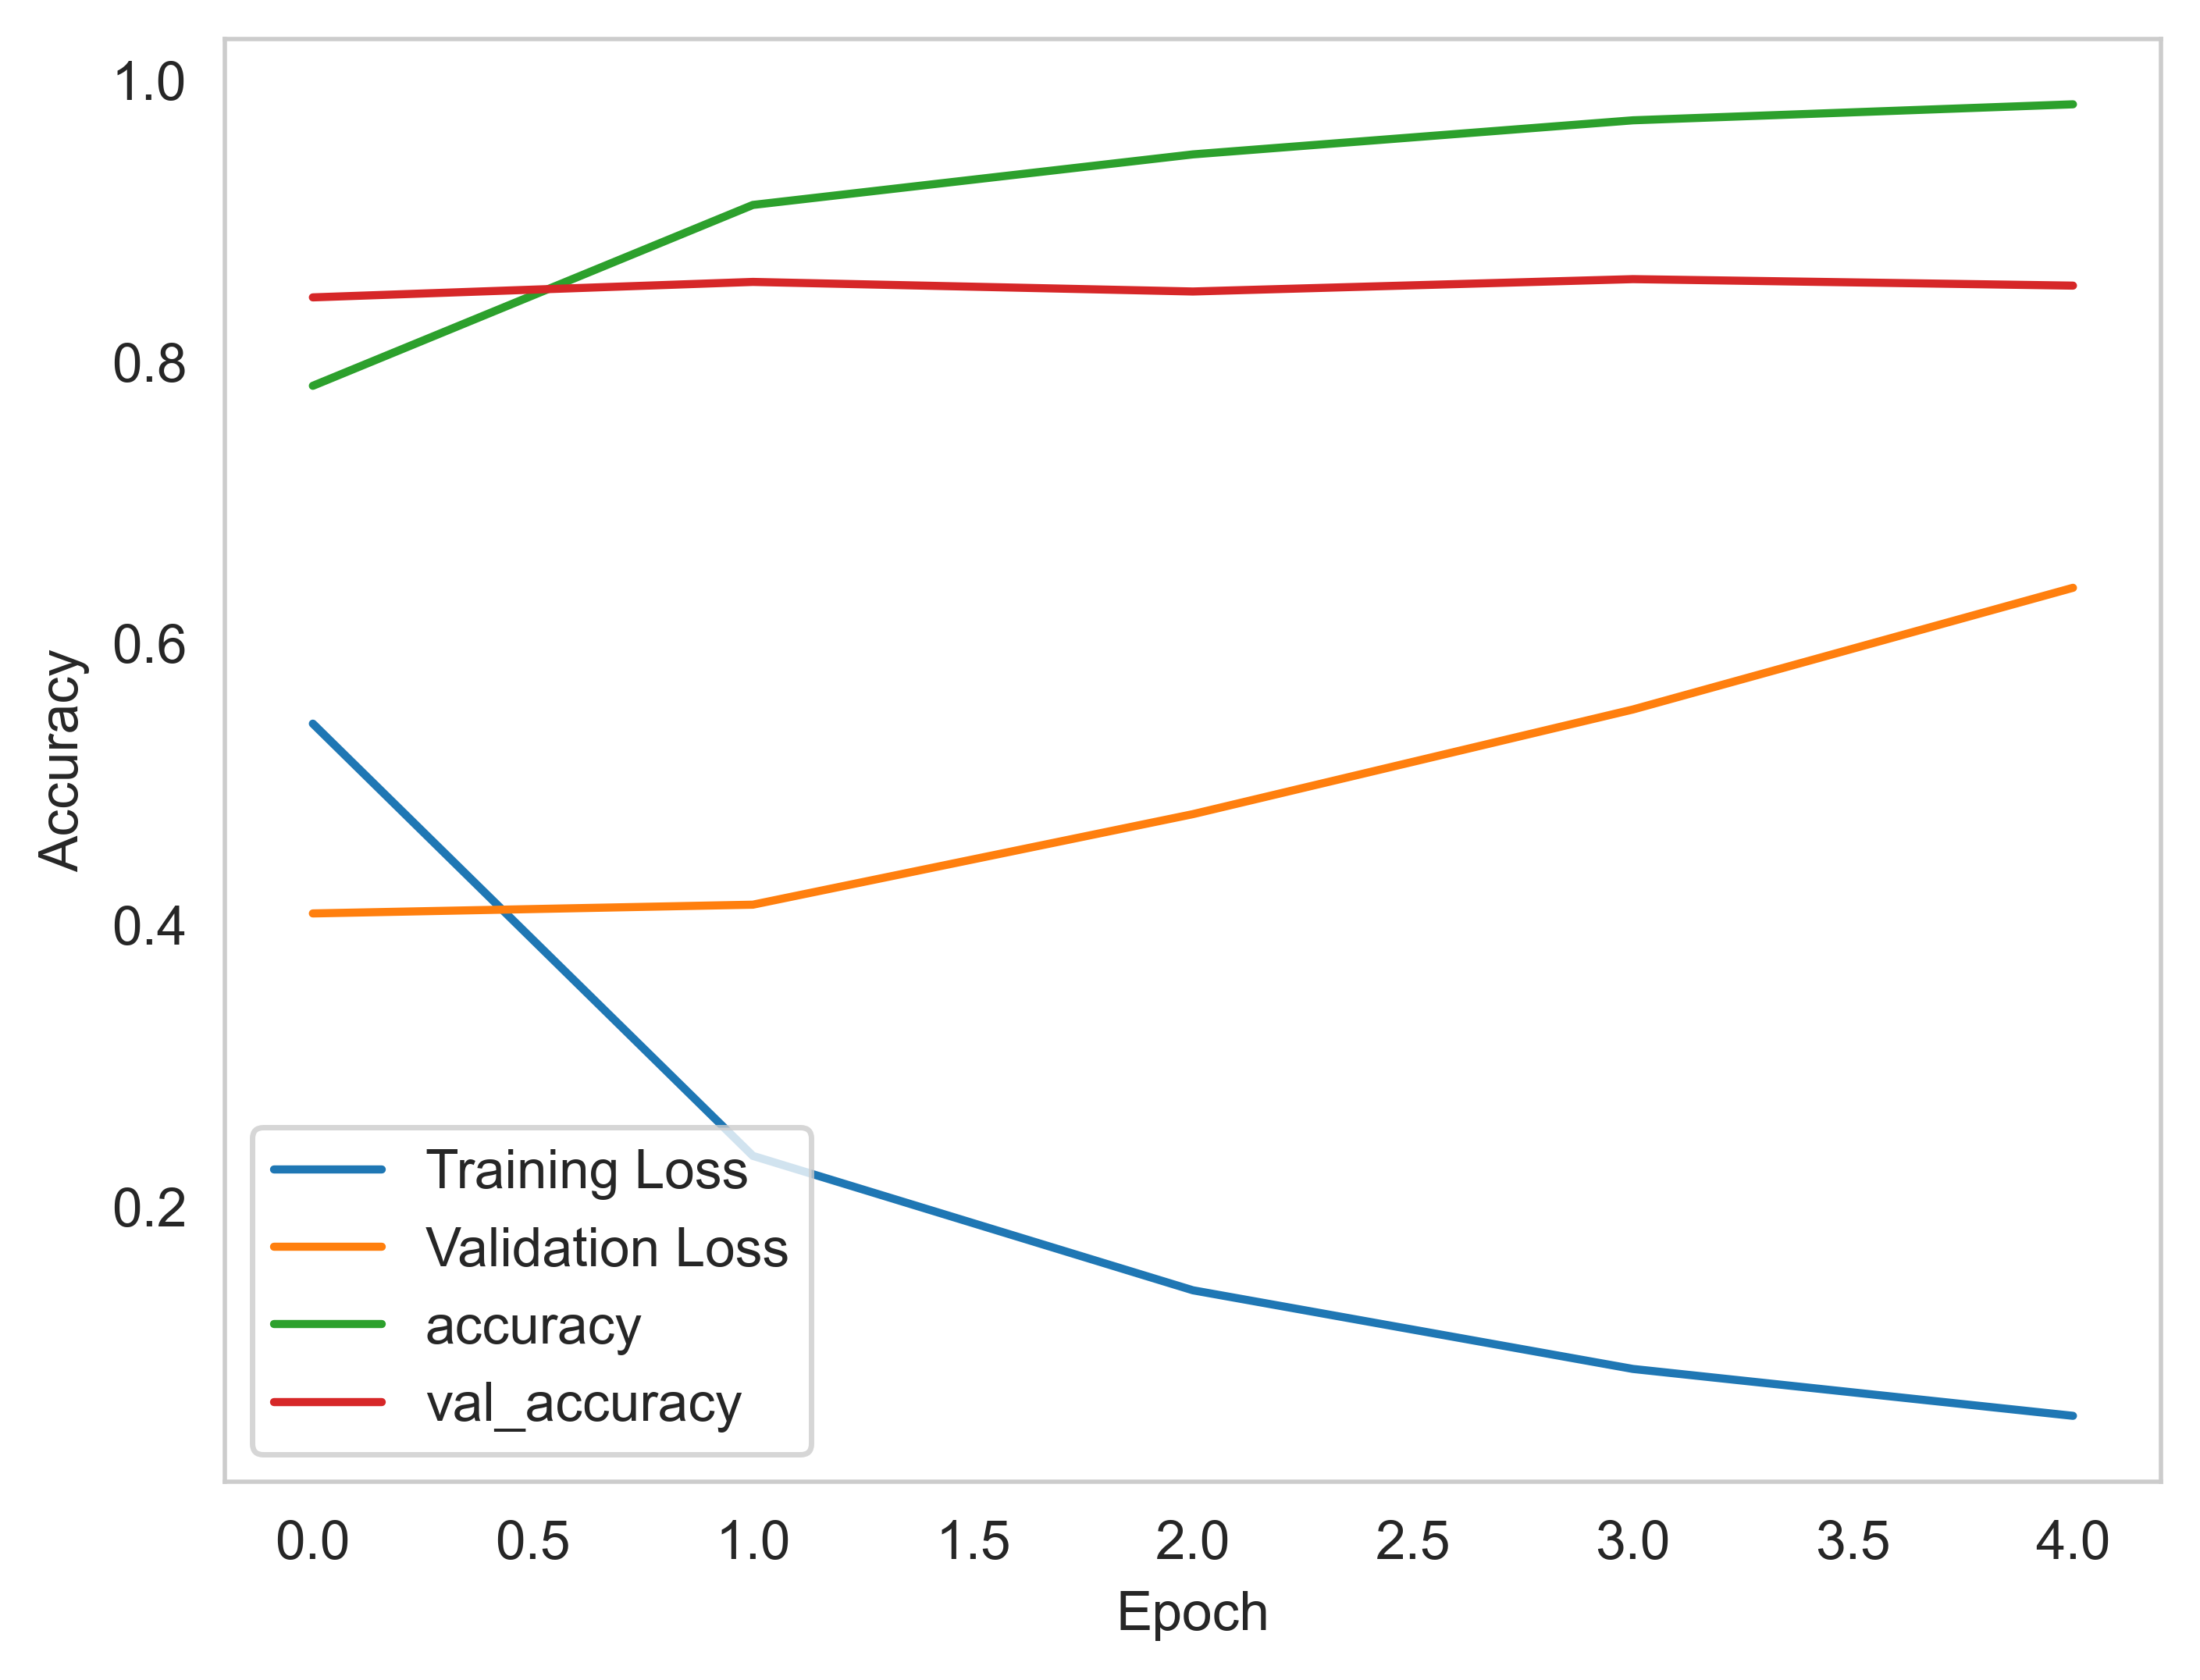

In [13]:
# Visualize training history (optional)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


## It is clearly overfitting. Lets train it again with limited epochs

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train model
history = model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2)
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6768 - loss: 0.7396 - val_accuracy: 0.8496 - val_loss: 0.3988
Epoch 2/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9126 - loss: 0.2360 - val_accuracy: 0.8606 - val_loss: 0.4033
Epoch 3/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9517 - loss: 0.1285 - val_accuracy: 0.8571 - val_loss: 0.4980
Epoch 4/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9754 - loss: 0.0711 - val_accuracy: 0.8586 - val_loss: 0.5851
Epoch 5/5
570/570 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9854 - loss: 0.0429 - val_accuracy: 0.8588 - val_loss: 0.6361
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8644 - loss: 0.6257
Test Accuracy: 0.8723217248916626


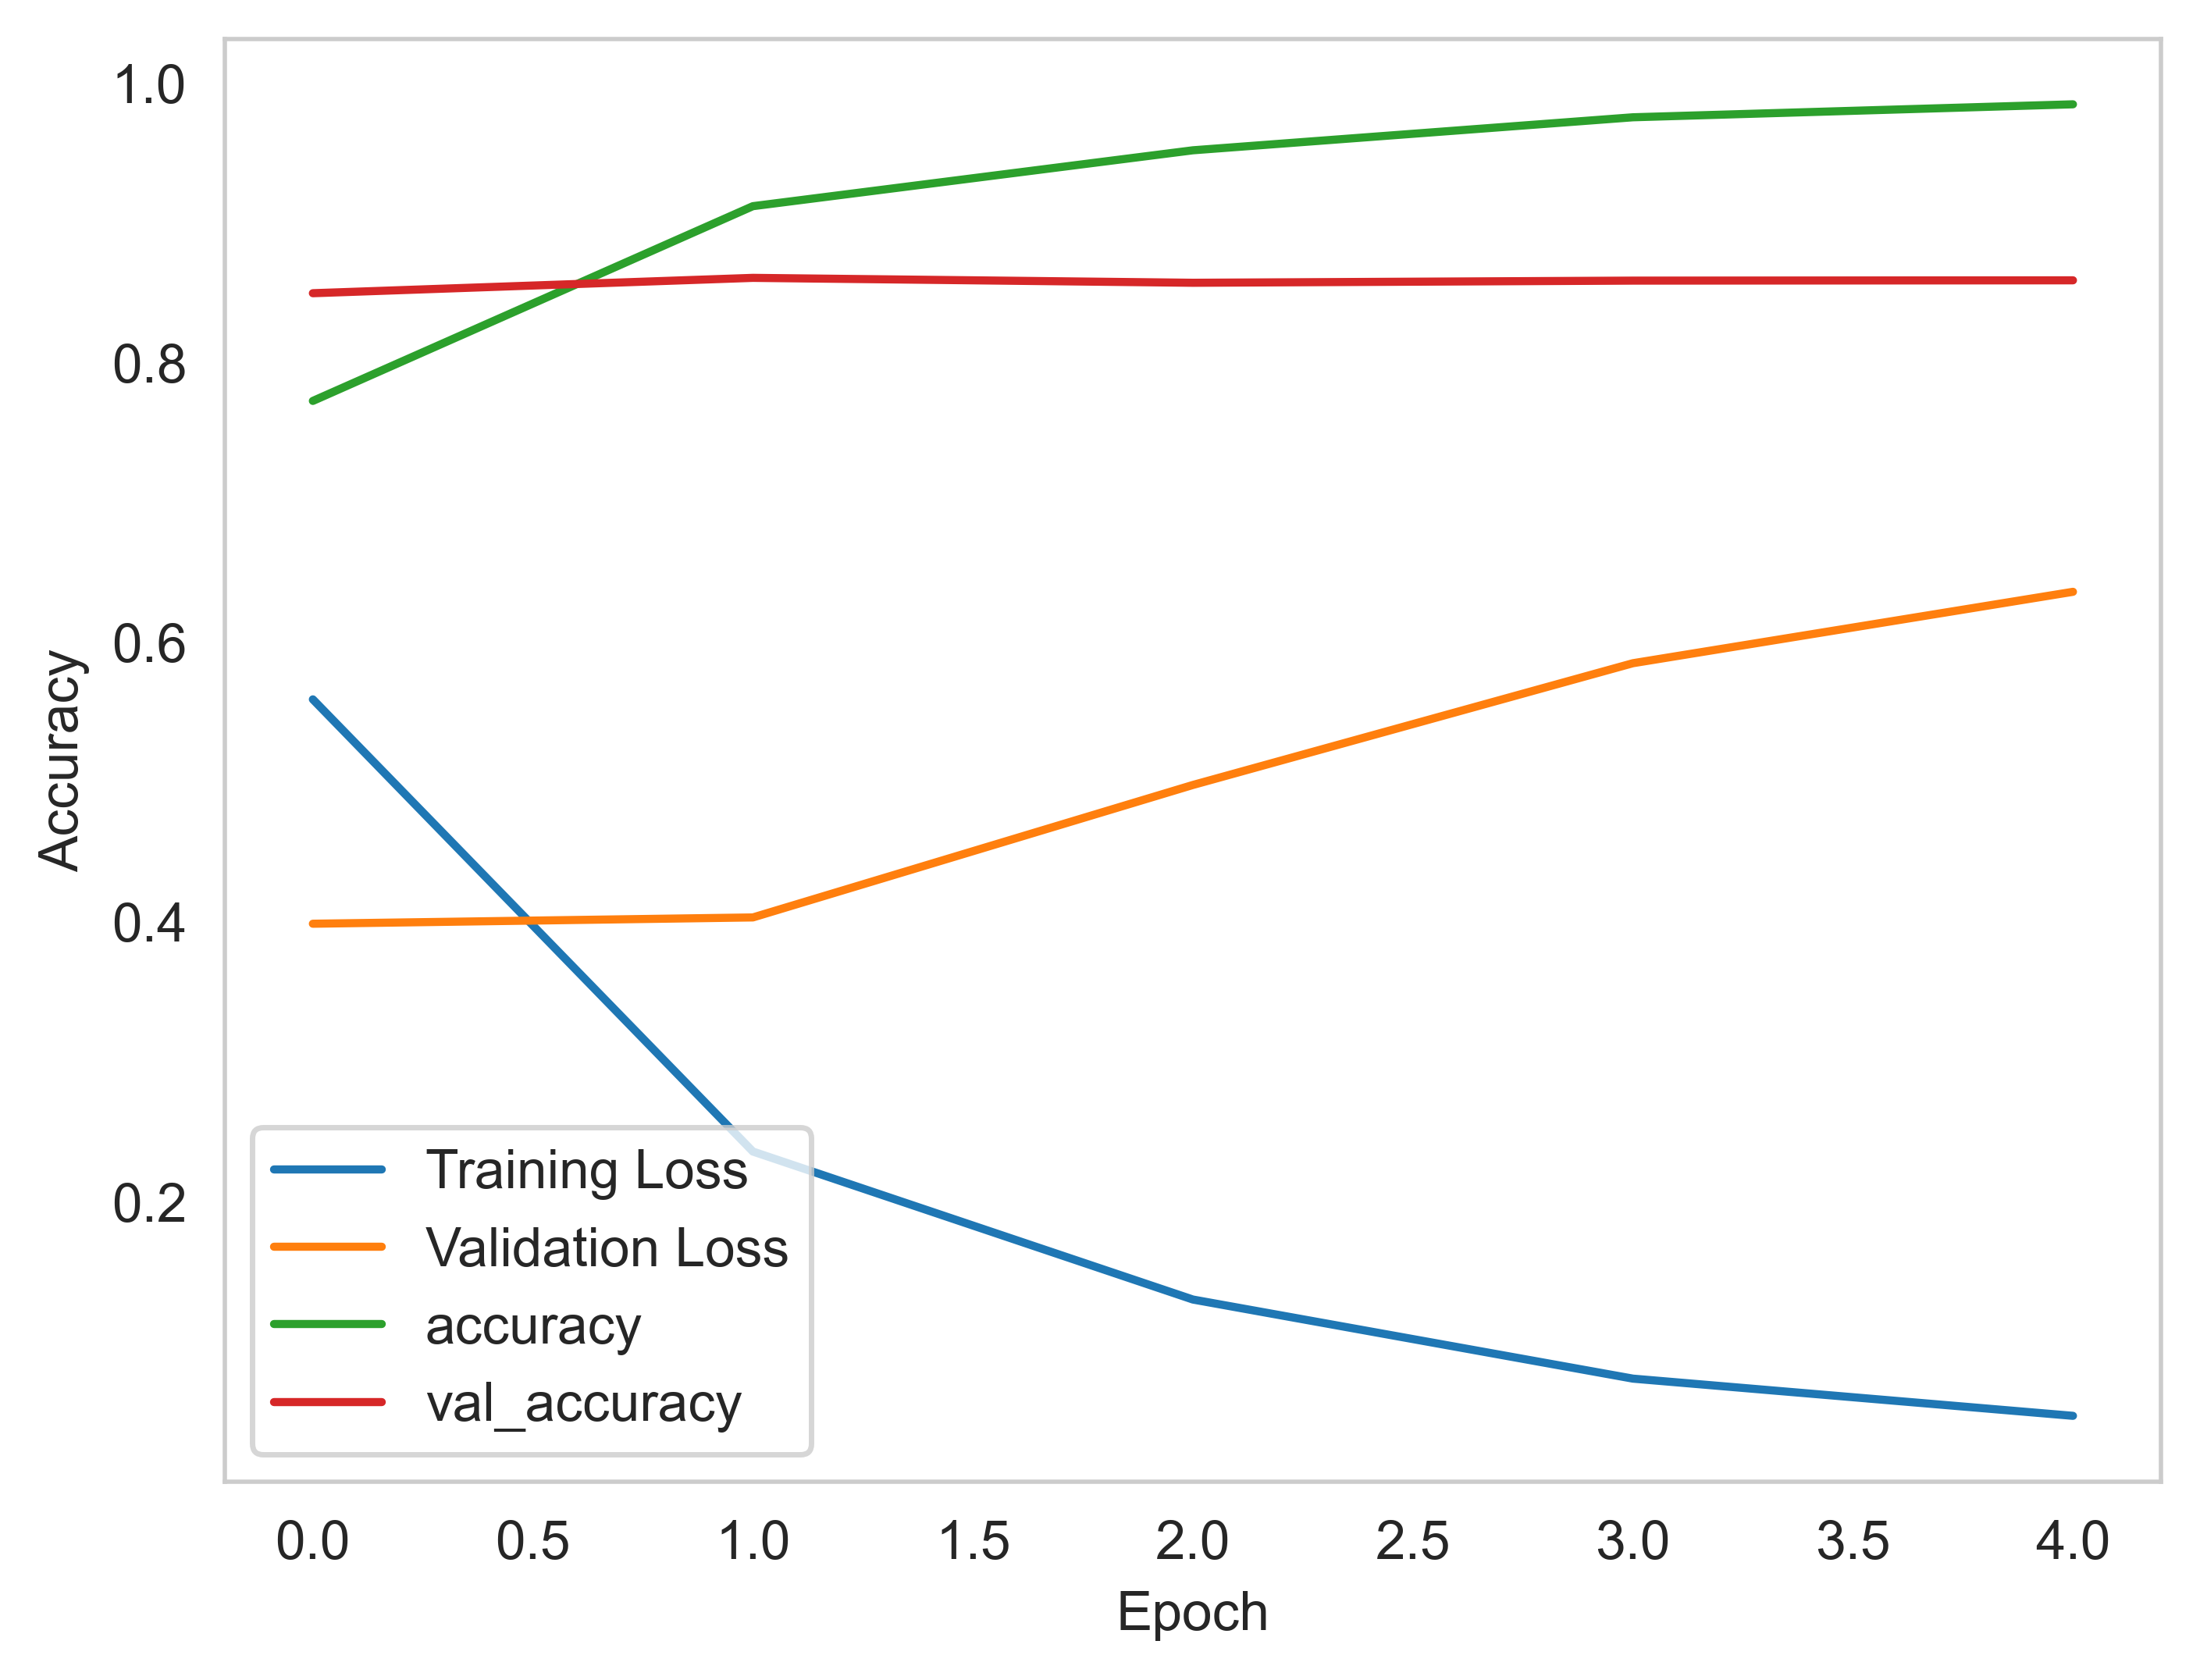

In [15]:
# Visualize training history (optional)
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [16]:
y_pred = model.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([2, 0, 2, ..., 2, 1, 2])

In [17]:
cm_cnn = confusion_matrix(y_test, y_pred_classes)
cm_cnn

array([[ 519,   89,   91],
       [  81, 2940,  202],
       [  71,  193, 1508]])

In [18]:
# printing confusion matrix
def plot_conf_mat(cm):
    class_names=['Negative', 'Neutral', 'Positive'] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, labels=[-1,0,1])
    plt.yticks(tick_marks, labels=class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

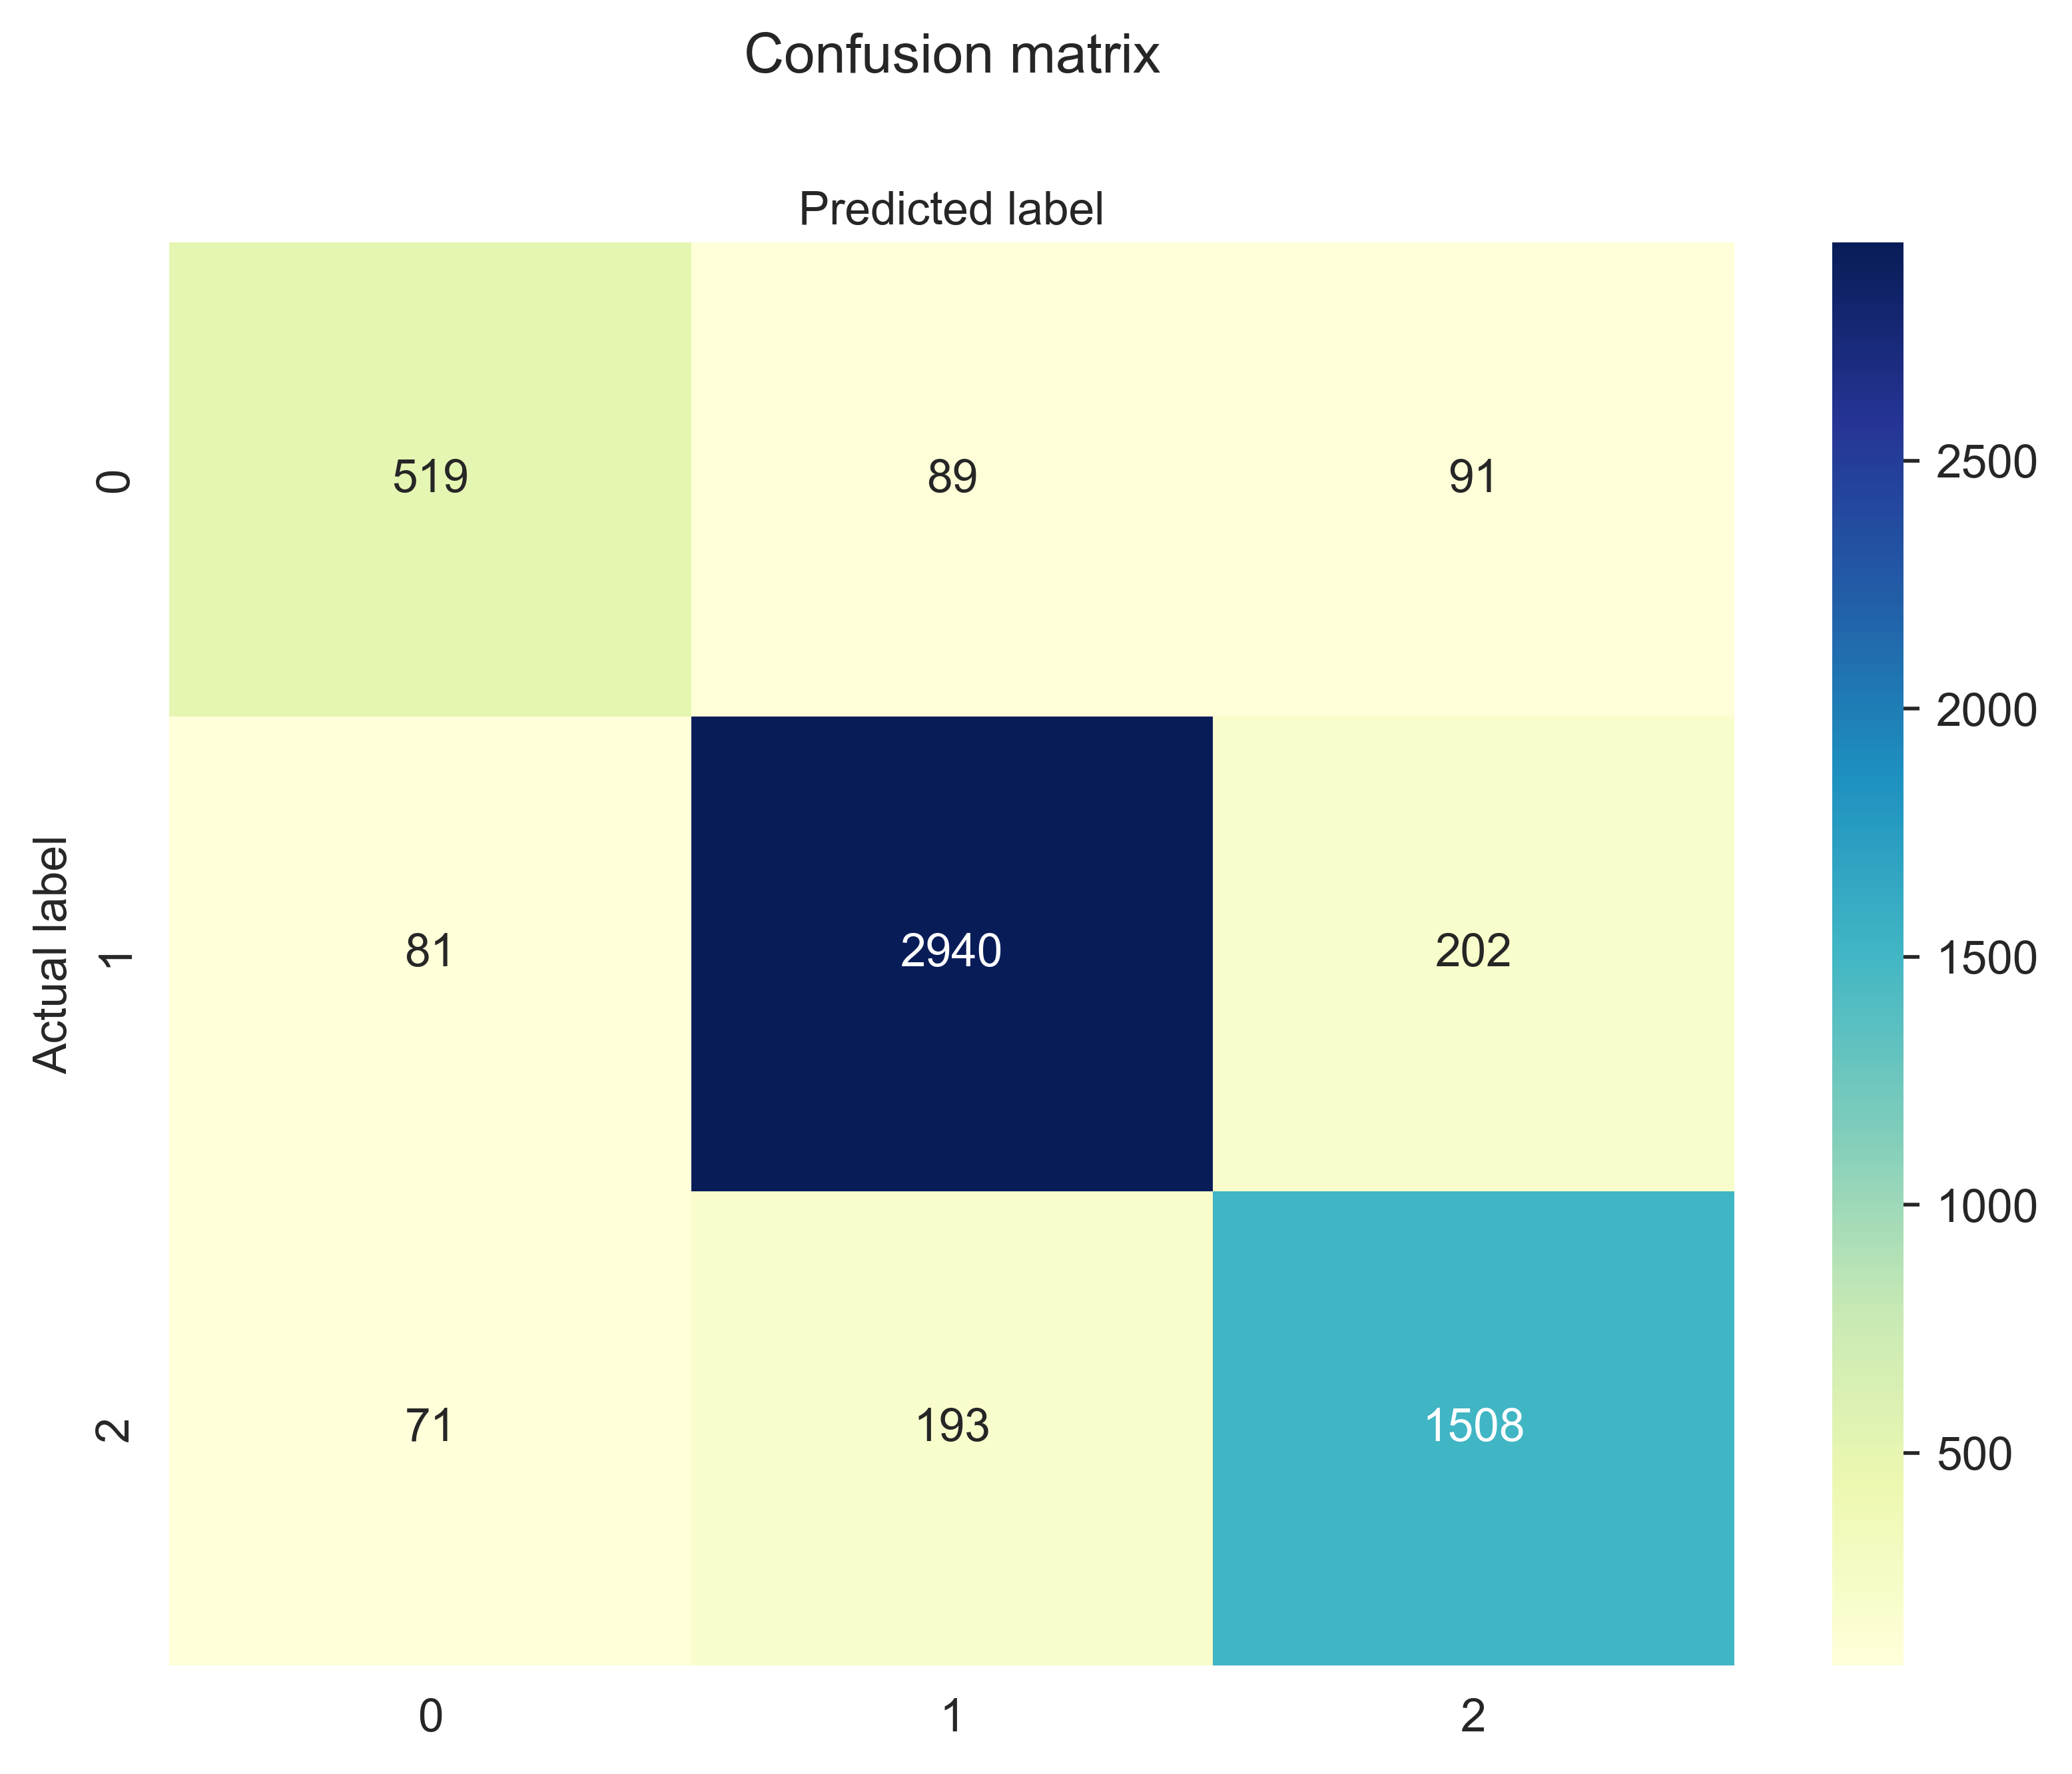

In [19]:
plot_conf_mat(cm_cnn)

In [20]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       699
           1       0.91      0.91      0.91      3223
           2       0.84      0.85      0.84      1772

    accuracy                           0.87      5694
   macro avg       0.84      0.84      0.84      5694
weighted avg       0.87      0.87      0.87      5694



## K-Fold Cross Validation

In [21]:
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 500))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [22]:
# Define number of folds
k_folds = 5

# Initialize lists to store per-fold histories
fold_accuracies = []
fold_val_accuracies = []
fold_losses = []
fold_val_losses = []

# Initialize KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation
for train_index, val_index in kf.split(X_train_pad):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Define and compile model
    model = create_model()  # Define your CNN model creation function
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=64, validation_data=(X_val_fold, y_val_fold))
    
    # Collecting accuracy and loss history
    fold_accuracies.append(history.history['accuracy'])
    fold_val_accuracies.append(history.history['val_accuracy'])
    fold_losses.append(history.history['loss'])
    fold_val_losses.append(history.history['val_loss'])

Epoch 1/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.6882 - loss: 0.7138 - val_accuracy: 0.8544 - val_loss: 0.3800
Epoch 2/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.9197 - loss: 0.2175 - val_accuracy: 0.8659 - val_loss: 0.3664
Epoch 3/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.9635 - loss: 0.1052 - val_accuracy: 0.8632 - val_loss: 0.4657
Epoch 4/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.9800 - loss: 0.0626 - val_accuracy: 0.8637 - val_loss: 0.5529
Epoch 5/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.9910 - loss: 0.0278 - val_accuracy: 0.8663 - val_loss: 0.6500
Epoch 6/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 59ms/step - accuracy: 0.9930 - loss: 0.0198 - val_accuracy: 0.8738 - val_loss: 0.6893
Epoch 7/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 17s 58ms/step - accuracy: 0.9957 - loss: 0.0129 - val_accuracy: 0.8724 - val_loss: 0.7350
Epoch 8/10
285/285 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - accuracy: 0.9961 - loss: 0.0122 - 

In [23]:
# Calculating mean of metrics across all folds
mean_accuracy = np.mean(fold_accuracies, axis=0)
mean_val_accuracy = np.mean(fold_val_accuracies, axis=0)
mean_loss = np.mean(fold_losses, axis=0)
mean_val_loss = np.mean(fold_val_losses, axis=0)

# Printing the mean accuracy and loss
print(f"Mean Training Accuracy: {mean_accuracy[-1]:.6f}")
print(f"Mean Validation Accuracy: {mean_val_accuracy[-1]:.6f}")
print(f"Mean Training Loss: {mean_loss[-1]:.6f}")
print(f"Mean Validation Loss: {mean_val_loss[-1]:.6f}")

Mean Training Accuracy: 0.996773
Mean Validation Accuracy: 0.869193
Mean Training Loss: 0.009403
Mean Validation Loss: 0.854027


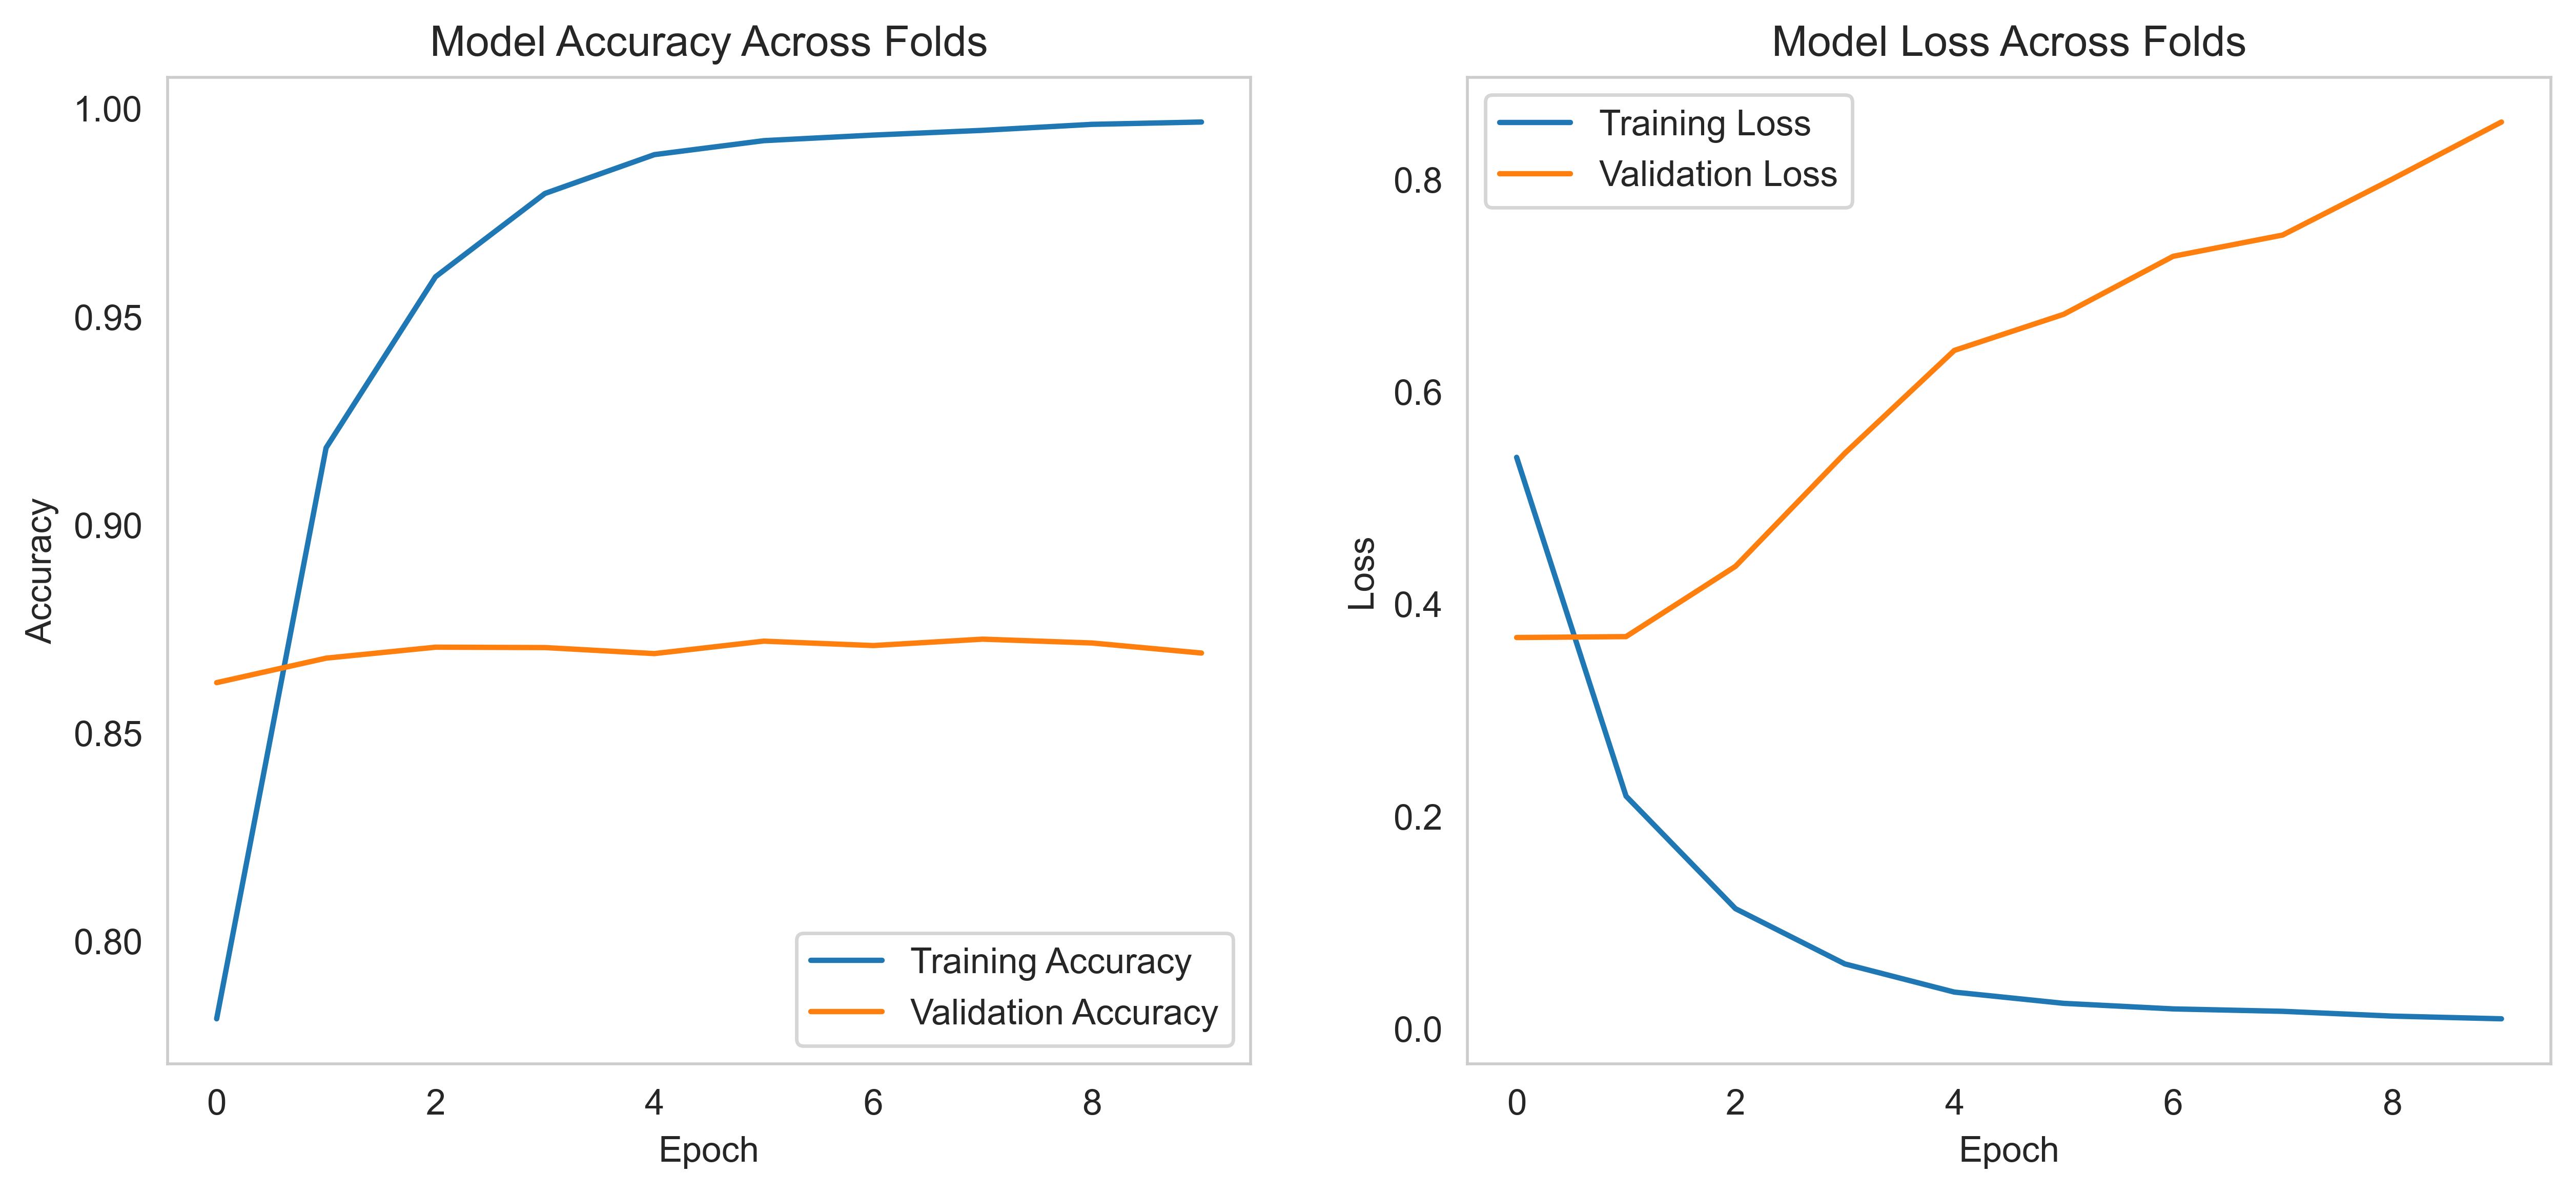

In [24]:
# Plotting model accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(mean_accuracy, label='Training Accuracy')
plt.plot(mean_val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy Across Folds')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(mean_loss, label='Training Loss')
plt.plot(mean_val_loss, label='Validation Loss')
plt.title('Model Loss Across Folds')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()